# Análisis de la Base de Datos


### Selección de la base de datos

Se utilizará la base de datos [*Students Performance Dataset - Academic Success Factors in High School Students*](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset), la cual contiene datos acerca de estudiantes de escuela secundaria, sus actividades extracurriculares, las horas de estudio, etc. 

El objetivo de la red a realizar es, a partir de los datos provistos, poder predecir el rendimiento académico de los alumnos, y determinar qué características influyen en dichos resultados.


In [23]:
#Se importa la librería para procesar la base de datos
import pandas as pd 

#Estas funciones modifican cuántos datos se ve cuando se imprime el dataframe 👇 se puede ir tocando
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.reset_option('all') #Esto lo reinicia

path_file = "students.csv"
dataframe = pd.read_csv(path_file) 
##print(dataframe)

C:\Users\juanb\AppData\Local\Temp\ipykernel_23140\2652195583.py:8: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\juanb\AppData\Local\Temp\ipykernel_23140\2652195583.py:8: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [24]:
dataframe.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000



### Tipos de datos:
A continuación se detallan las columnas con las que se cuenta, y los tipos de datos que representan:
- StudentID: Número de identificación del estudiante (Categórica)
- Age: Edad de los estudiantes (valores entre 15 y 18 años) (Discreta)
- Gender: Género (0 = masculino, 1 = femenino) (Categórica)
- Ethnicity: Etnia (0 = Caucásico, 1 = Afroamericano, 2 = Asiático, 3 = Otro) (Categórica)
- ParentalEducation: Educación máxima alcanzada por los padres (0 = Ninguna, 1 = Secundario completo, 2 = Universidad, 3 = Bachiller, 4 = Más alto) (Categórica)
- StudyTimeWeekly: Horas semanales de estudio (Continua)
- Absences: Inasistencias durante un año (Discreta)
- Tutoring: Si reciben tutoría especial (0 = No, 1 = Sí) (Categórica)
- ParentalSupport: Nivel de apoyo de los padres (0 = Ninguno, 1 = Bajo, 2 = Moderado, 3 = Alto, 4 = Muy alto) (Categórica)
- Extracurricular-Sports-Music-Volunteering: Si realiza actividades extracurriculares, como deportes, música o solidarias (0 = No, 1 = Sí) (Categórica)
- GPA: Calificación, en una escala de 2 a 4 (Continua)
- GradeClass: Clasificación según GPA{ 
    
                                        0: 'A' (GPA >= 3.5)
                                        1: 'B' (3.0 <= GPA < 3.5)
                                        2: 'C' (2.5 <= GPA < 3.0)
                                        3: 'D' (2.0 <= GPA < 2.5)
                                        4: 'F' (GPA < 2.0)(Categórica)}

### Correlaciones

Para determinar cuáles de las características estudiadas tienen más relación con la calificación de los estudiantes, que es lo que se quiere intentar predecir, se puede calcular el índice de correlación entre las variables, donde valores cercanos a 1 y a -1 indican mayor dependencia positiva o negativa, respectivamente.
En caso de que los valores tiendan a 0, prácticamente no hay ningún tipo de relación entre las variables.


In [25]:
#Evaluación de correlación de variables respecto de la columna "GPA"
print(dataframe.corr()["GPA"])

StudentID           -0.002697
Age                  0.000275
Gender              -0.013360
Ethnicity            0.027760
ParentalEducation   -0.035854
StudyTimeWeekly      0.179275
Absences            -0.919314
Tutoring             0.145119
ParentalSupport      0.190774
Extracurricular      0.094078
Sports               0.057859
Music                0.073318
Volunteering         0.003258
GPA                  1.000000
GradeClass          -0.782835
Name: GPA, dtype: float64


# ACÁ PODRÍA IR EL GRÁFICO DE LOS CUADRADOS DE COLORES BIEN FACHA

Lo primero que podemos observar es que las variables que más se relacionan con GPA son las inasistencias y la clasificación según GPA, ambas de forma negativa, lo cual, a simple vista, es lógico. Pareciera ser que, a más inasistencias, menor será el rendimiento. Además, un valor de clasificación bajo, por la forma en que se creó el dataframe, indica un GPA alto.
Otra observación posible es que tanto el ID del estudiante, como su edad, género o etnia no influyen en las calificaciones de un alumno.

Entonces, en resumidas cuentas, las variables que **sí nos interesan**  (porque el GPA dependerá en parte de ellas) son: 
* Inasistencias
* Calificación según GPA
 
Y en menor medida:
* *Horas semanales de estudio*
* *Tutoria* 
* *Soporte parental*

Por otro lado, la que **no nos interesan** (porque no influyen directamente en el GPA, o porque no es el enfoque de la red) son:
* Edad
* Género
* Etnia

    * *Solidarias* (actividad extracurricular)

En ambos casos, tenemos en primer lugar las más relevantes, y luego las menos relevantes.

Las variables de *Deportes* y *Música*, si bien no demuetran una fuerte influencia, tampoco una correlación extremadamente baja, por lo que podríamos dejarlas.

A continuación, una representación gráfica de las correlaciones anteriormente mencionadas.

Los gráficos muestran la correlación entre las distintas variables que mencionamos y el GPA.

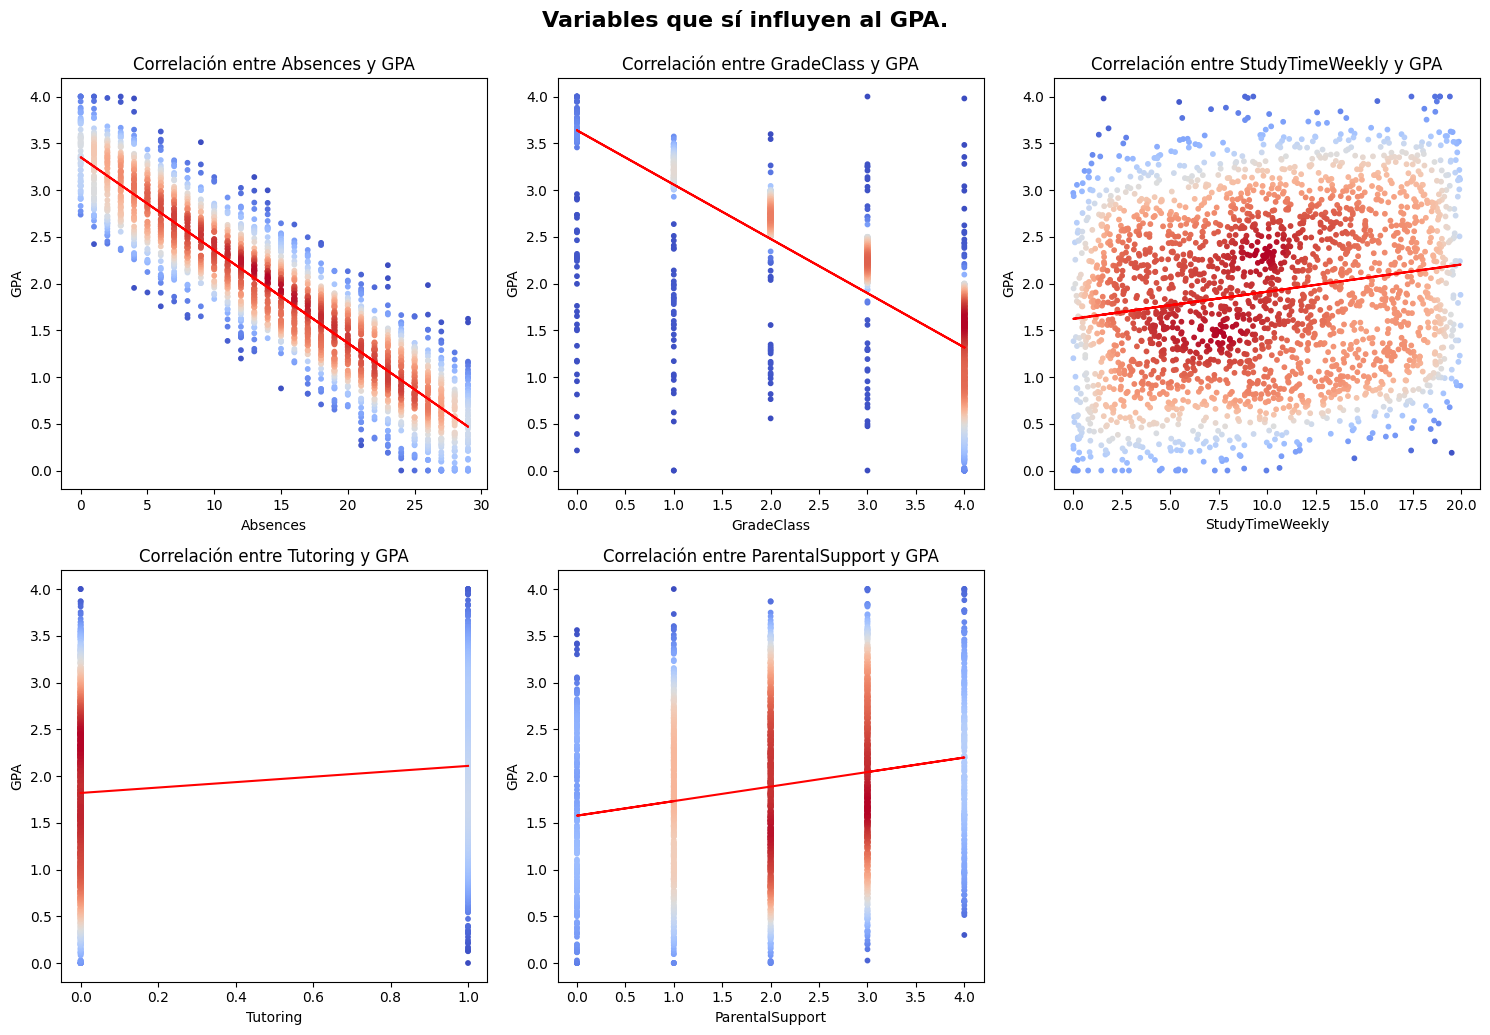

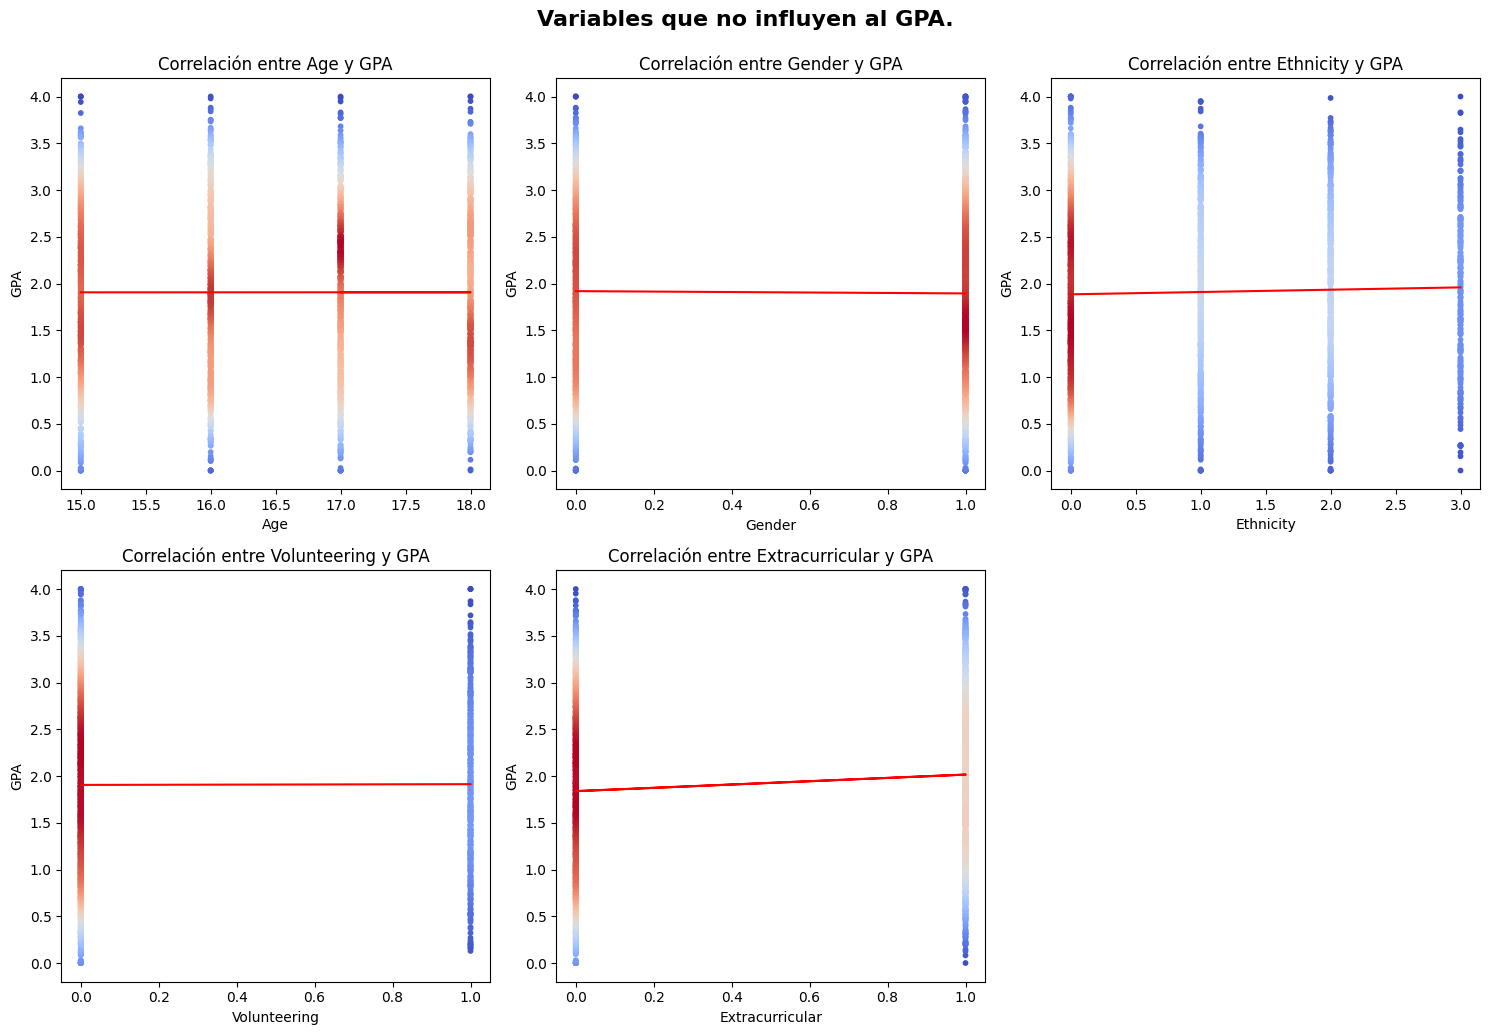

In [27]:
#Se importan las librerías para crear los gráficos
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde  

# Lista de variables que vamos a comparar contra el GPA. 
variablesConCorrelacion = ["Absences", "GradeClass", "StudyTimeWeekly", "Tutoring", "ParentalSupport"]
variablesSinCorrelacion = ["Age", "Gender", "Ethnicity", "Volunteering", "Extracurricular"]

# Función para graficar listas de variables contra el GPA, ajustada para el número de variables.
def graficadoraCorrelacionGPA(listaDeVariables, titulo):
    num_variables = len(listaDeVariables)  # Número de variables en la lista
    num_filas = (num_variables + 2) // 3  # Calcular el número de filas necesarias (3 por fila)

    fig, axs = plt.subplots(num_filas, 3, figsize=(15, 5 * num_filas))
    axs = axs.flatten()

    for i, var in enumerate(listaDeVariables):  # Iteramos por cada elemento de la lista.
        x = dataframe[var]
        y = dataframe["GPA"]

        # Calcular la densidad de los puntos
        xy = np.vstack([x, y])
        densidad = gaussian_kde(xy)(xy)

        # Ordenamos por densidad
        idx = densidad.argsort()
        x, y, densidad = x[idx], y[idx], densidad[idx]

        # Graficamos el scatter plot usando la densidad para el color de los puntos
        sc = axs[i].scatter(x, y, c=densidad, cmap='coolwarm', s=10)  

        # Ajustamos una regresión lineal para ver mejor la correlación
        m, b = np.polyfit(x, y, 1)
        axs[i].plot(x, (m * x + b), color="red")  # Línea roja

        axs[i].set_title(f"Correlación entre {var} y GPA")
        axs[i].set_xlabel(var)
        axs[i].set_ylabel("GPA")
    
    # Eliminar gráficos vacíos
    for j in range(i + 1, len(axs)):  
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle(titulo, fontweight='bold', fontsize=16, y=1.03)
    plt.show()

# Ahora llamamos la función para ambas listas
graficadoraCorrelacionGPA(variablesConCorrelacion, "Variables que sí influyen al GPA.")
graficadoraCorrelacionGPA(variablesSinCorrelacion, "Variables que no influyen al GPA.")


Con los gráficos anteriores, queda en evidencia lo planteado.

Si bien podría no haber sido necesario hacerlos, con esto queda confirmado que hay variables que **no nos sirven**, como *age*, *gender*, *volunteering* o *ethnicity*. Y si bien en esta última se aprecia una pequeña pendiente, es despreciable, y más aún cuando no es nuestro objeto de estudio.

### Transformaciones

En este caso, no es necesario realizar transformaciones a los datos, ya que están convertidos a valores numéricos aptos para el desarrollo de una red neuronal, es decir, que pueden usarse para realizar multiplicaciones matriciales, y están determinados siguiendo una determinada lógica (por ejemplo, un valor más bajo de clase implica un mejor rendimiento, y no es un número asignado arbitrariamente). Sin embargo, sí se puede eliminar en primera instancia las variables que no influyen en el rendimiento académico de los estudiantes, las cuales se detallaron más arriba.

In [87]:
#Se elimina las columnas de ID, Edad, Género y Etnia
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity"], inplace = True)
print(dataframe)

      ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  \
0                     2        19.833723         7         1                2   
1                     1        15.408756         0         0                1   
2                     3         4.210570        26         0                2   
3                     3        10.028829        14         0                3   
4                     2         4.672495        17         1                3   
...                 ...              ...       ...       ...              ...   
2387                  3        10.680555         2         0                4   
2388                  1         7.583217         4         1                4   
2389                  2         6.805500        20         0                2   
2390                  0        12.416653        17         0                2   
2391                  2        17.819907        13         0                2   

      Extracurricular  Spor

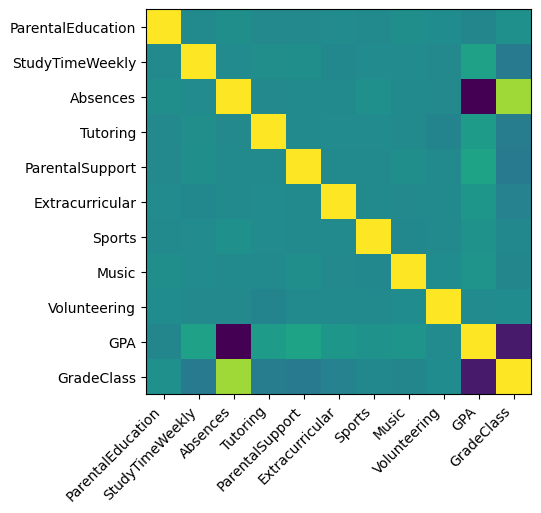

In [88]:
#Esto lo copié de lo que pasó el profe ¯\_(ツ)_/¯ ajustar

import matplotlib.pyplot as plt
labels = dataframe.columns.to_list()
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow((dataframe.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(dataframe.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(dataframe.columns.to_list(), ha='right');